<a href="https://colab.research.google.com/github/azulito26/Misi-n-Khalid/blob/main/Propuesta_An%C3%A1lisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis votaciones 2022

## 1. Carga de paquetes y librerias

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Carga de los datos

In [23]:

# Cargar el nuevo archivo Excel
file_path_updated = "/content/Copia de NUEVO_LIMPIO_PROCESADO.xlsx"

# Leer la hoja del archivo para verificar su estructura
xls_updated = pd.ExcelFile(file_path_updated)
xls_updated.sheet_names


['Sheet1']

In [24]:
# Cargar la hoja correcta
df_updated = pd.read_excel(xls_updated, sheet_name="Sheet1")

# Mostrar las primeras filas para identificar la estructura del dataset
df_updated.head(20)

,Provincia,Cantón,Importancia_Tamaño_Poblacion,Electorado,Votos_Totales,Porcentaje_Participacion,Total_Votos,Accesibilidad_Sin_Exclusion,Accion_Ciudadana,Alianza_Democrata_Cristiana,...,Union_Costarricense_Democratica,Union_Liberal,Nulos,Blancos,Abstencionismo_Absoluto,Abstencionismo_Porcentaje,Lugar_Ocupo_PLN_2022,Votos_Para_Llegar_40,Votos_Necesarios_40,Votos_PLN_2022
0,SAN JOSÉ,SAN JOSÉ,1,237.728,145.490,61.2,33.758,133.0,194.0,69.0,...,2.874,239.0,43.0,99.0,839,380,92.238,38.8,1,58.196
1,SAN JOSÉ,ESCAZÚ,9,50.442,34.022,67.4,103.512,723.0,512.0,180.0,...,11.090,841.0,368.0,287.0,173,91,16.420,32.6,1,13.609
2,SAN JOSÉ,DESAMPARADOS,2,166.029,104.564,63.0,19.385,89.0,126.0,54.0,...,3.439,119.0,65.0,56.0,647,405,61.465,37.0,1,41.826
3,SAN JOSÉ,PURISCAL,14,29.937,19.709,65.8,7.967,43.0,45.0,16.0,...,1.392,80.0,35.0,25.0,201,123,10.228,34.2,1,7.884
4,SAN JOSÉ,TARRAZÚ,16,12.707,8.086,63.6,27.622,212.0,179.0,36.0,...,3.571,262.0,91.0,69.0,60,59,4.621,36.4,1,3.234
5,SAN JOSÉ,ASERRÍ,11,44.906,27.925,62.2,15.083,103.0,82.0,27.0,...,1.833,109.0,40.0,54.0,183,120,16.981,37.8,1,11.170
6,SAN JOSÉ,MORA,15,23.192,15.267,65.8,57.142,327.0,492.0,156.0,...,6.296,597.0,132.0,197.0,109,75,7.925,34.2,1,6.107
7,SAN JOSÉ,GOICOECHEA,4,92.061,57.625,62.6,26.368,101.0,159.0,50.0,...,2.754,156.0,42.0,61.0,311,172,34.436,37.4,1,23.050
8,SAN JOSÉ,SANTA ANA,13,39.066,26.565,68.0,30.676,237.0,127.0,91.0,...,3.413,310.0,91.0,106.0,131,66,12.501,32.0,1,10.602
9,SAN JOSÉ,ALAJUELITA,7,53.246,31.027,58.3,37.553,223.0,268.0,98.0,...,3.809,362.0,72.0,117.0,238,113,22.219,41.7,1,12.411


## 2. Análisis

### A. Nivel Provincial

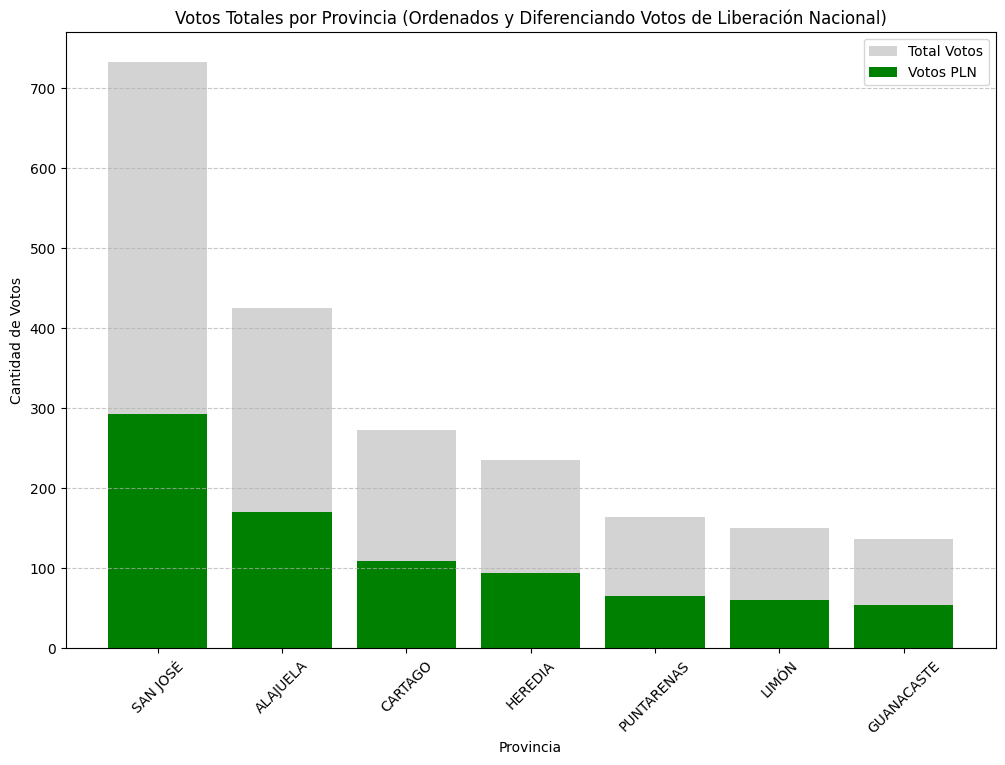

In [25]:
# Filtrar los votos de Liberación Nacional (PLN) por provincia
votos_pln_por_provincia = df_updated.groupby('Provincia')['Votos_PLN_2022'].sum()
votos_totales_por_provincia = df_updated.groupby('Provincia')['Votos_Totales'].sum()
# Ordenar las provincias por la cantidad total de votos
votos_totales_por_provincia = votos_totales_por_provincia.sort_values(ascending=False)
votos_pln_por_provincia = votos_pln_por_provincia.reindex(votos_totales_por_provincia.index)

# Crear el gráfico de barras apiladas con orden
plt.figure(figsize=(12, 8))

# Gráfico de votos totales en gris claro
plt.bar(votos_totales_por_provincia.index, votos_totales_por_provincia, label='Total Votos', color='lightgray')

# Gráfico de votos del PLN en verde (superpuesto)
plt.bar(votos_pln_por_provincia.index, votos_pln_por_provincia, label='Votos PLN', color='green')

# Personalización del gráfico
plt.title('Votos Totales por Provincia (Ordenados y Diferenciando Votos de Liberación Nacional)')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Votos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


1. *Provincias con Mayor Cantidad de Votos*:
Las provincias con mayor cantidad de votos son claramente San José, Alajuela y Cartago.
Estas provincias presentan una gran diferencia en el volumen total de votos en comparación con las demás.
2. *Provincias con Mayor Cantidad de Votos del PLN*:
El partido Liberación Nacional (PLN) también obtiene una gran cantidad de votos en las provincias con mayor volumen, especialmente en San José y Alajuela.
Esto sugiere que el PLN tiene una fuerte presencia en las provincias con alta densidad poblacional.
3. *Proporción de Votos del PLN sobre el Total*:
Aunque el PLN tiene una presencia significativa en términos absolutos, la proporción de votos obtenidos varía entre provincias.
En algunas provincias, el volumen de votos del PLN es considerable en comparación con el total (como en San José), mientras que en otras su participación es relativamente menor.
4. *Diferencias Regionales*:
Las provincias más pequeñas y menos pobladas como Guanacaste, Puntarenas y Limón muestran un volumen de votos mucho menor en comparación con las provincias centrales, lo que también influye en la cantidad de votos para el PLN.



### B. Nivel Cantonal

#### 1. San José

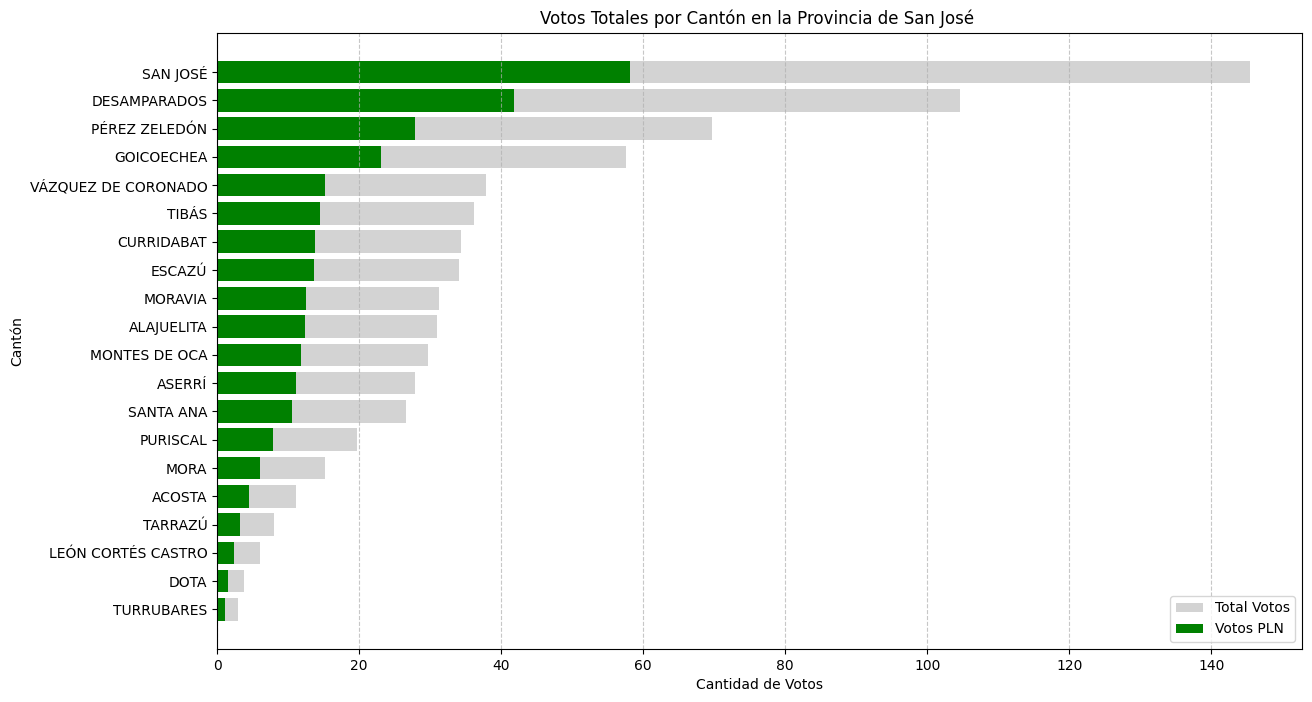

In [26]:
# Filtrar los datos de la provincia de San José
df_san_jose = df_updated[df_updated['Provincia'] == 'SAN JOSÉ']

# Agrupar los votos totales y los votos de PLN por cantón
votos_totales_canton = df_san_jose.groupby('Cantón')['Votos_Totales'].sum().sort_values(ascending=False)
votos_pln_canton = df_san_jose.groupby('Cantón')['Votos_PLN_2022'].sum().reindex(votos_totales_canton.index)

# Ordenar los cantones de mayor a menor cantidad de votos totales
votos_totales_canton = votos_totales_canton.sort_values(ascending=True)  # Orden ascendente para gráfico horizontal
votos_pln_canton = votos_pln_canton.reindex(votos_totales_canton.index)

# Crear el gráfico de barras apiladas para los cantones de San José con etiquetas ordenadas
plt.figure(figsize=(14, 8))

# Gráfico de votos totales en gris claro
plt.barh(votos_totales_canton.index, votos_totales_canton, label='Total Votos', color='lightgray')

# Gráfico de votos del PLN en verde (superpuesto)
plt.barh(votos_pln_canton.index, votos_pln_canton, label='Votos PLN', color='green')

# Personalización del gráfico
plt.title('Votos Totales por Cantón en la Provincia de San José ')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Cantón')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


**Foco Urbano**: El PLN obtiene su mayor cantidad de votos en cantones con mayor densidad poblacional, lo que sugiere un enfoque estratégico en centros urbanos.

**Desafíos en Cantones Pequeños**: Aunque mantiene presencia en cantones menos poblados, el volumen de votos es mucho menor, lo que puede indicar una oportunidad para reforzar estrategias en estas áreas.

**Diferencias en la Proporción de Votos**: A pesar de obtener muchos votos en los cantones más grandes, su proporción sobre el total de votos puede variar significativamente.

#### 2. Alajuela

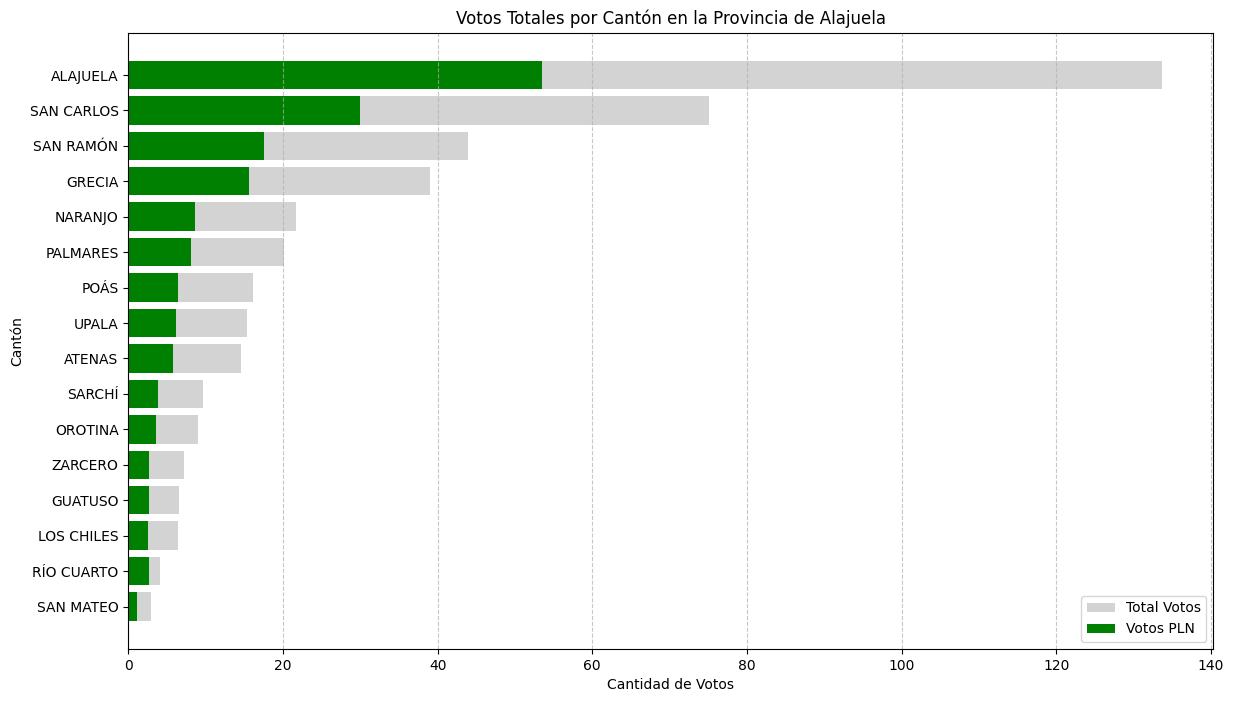

In [27]:
# Filtrar los datos de la provincia de Alajuela
df_alajuela = df_updated[df_updated['Provincia'] == 'ALAJUELA']

# Agrupar los votos totales y los votos de PLN por cantón
votos_totales_canton_alajuela = df_alajuela.groupby('Cantón')['Votos_Totales'].sum().sort_values(ascending=True)
votos_pln_canton_alajuela = df_alajuela.groupby('Cantón')['Votos_PLN_2022'].sum().reindex(votos_totales_canton_alajuela.index)

# Crear el gráfico de barras apiladas para los cantones de Alajuela con etiquetas ordenadas
plt.figure(figsize=(14, 8))

# Gráfico de votos totales en gris claro
plt.barh(votos_totales_canton_alajuela.index, votos_totales_canton_alajuela, label='Total Votos', color='lightgray')

# Gráfico de votos del PLN en verde (superpuesto)
plt.barh(votos_pln_canton_alajuela.index, votos_pln_canton_alajuela, label='Votos PLN', color='green')

# Personalización del gráfico
plt.title('Votos Totales por Cantón en la Provincia de Alajuela')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Cantón')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


El partido Liberación Nacional (PLN) sigue siendo dominante en los centros urbanos de Alajuela, pero su proporción de votos puede variar significativamente en los cantones más pequeños o rurales.

La estrategia de campaña parece estar más centrada en áreas densamente pobladas, lo que le permite acumular un volumen significativo en los cantones principales.

#### 3. Cartago

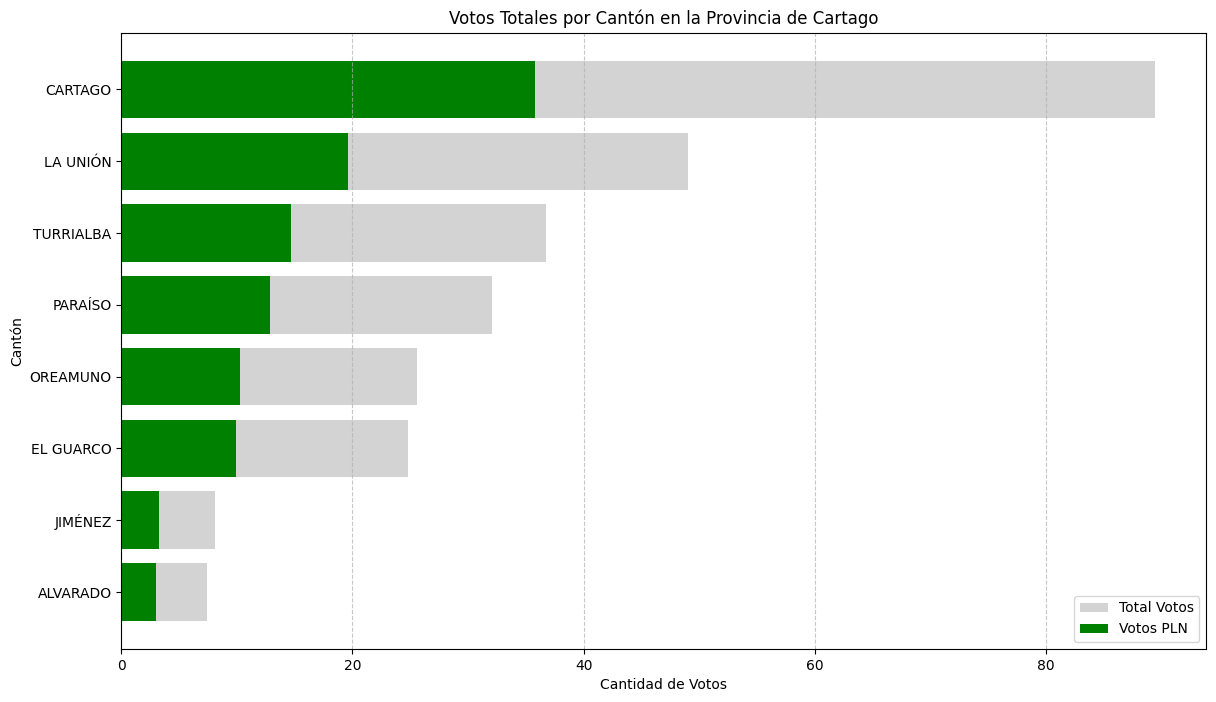

In [28]:
# Filtrar los datos de la provincia de Cartago
df_cartago = df_updated[df_updated['Provincia'] == 'CARTAGO']

# Agrupar los votos totales y los votos de PLN por cantón
votos_totales_canton_cartago = df_cartago.groupby('Cantón')['Votos_Totales'].sum().sort_values(ascending=True)
votos_pln_canton_cartago = df_cartago.groupby('Cantón')['Votos_PLN_2022'].sum().reindex(votos_totales_canton_cartago.index)

# Crear el gráfico de barras apiladas para los cantones de Cartago con etiquetas ordenadas
plt.figure(figsize=(14, 8))

# Gráfico de votos totales en gris claro
plt.barh(votos_totales_canton_cartago.index, votos_totales_canton_cartago, label='Total Votos', color='lightgray')

# Gráfico de votos del PLN en verde (superpuesto)
plt.barh(votos_pln_canton_cartago.index, votos_pln_canton_cartago, label='Votos PLN', color='green')

# Personalización del gráfico
plt.title('Votos Totales por Cantón en la Provincia de Cartago')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Cantón')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


**Presencia Urbana vs Rural:**
El PLN mantiene una fuerte presencia en los cantones urbanos más grandes como Cartago y La Unión, pero su proporción de votos disminuye en cantones rurales y menos poblados.

**Distribución de Votos del PLN:**
Aunque los cantones grandes capturan la mayor parte de los votos del PLN, hay una dispersión interesante en los cantones rurales donde aún conserva relevancia.

#### 4. Heredia

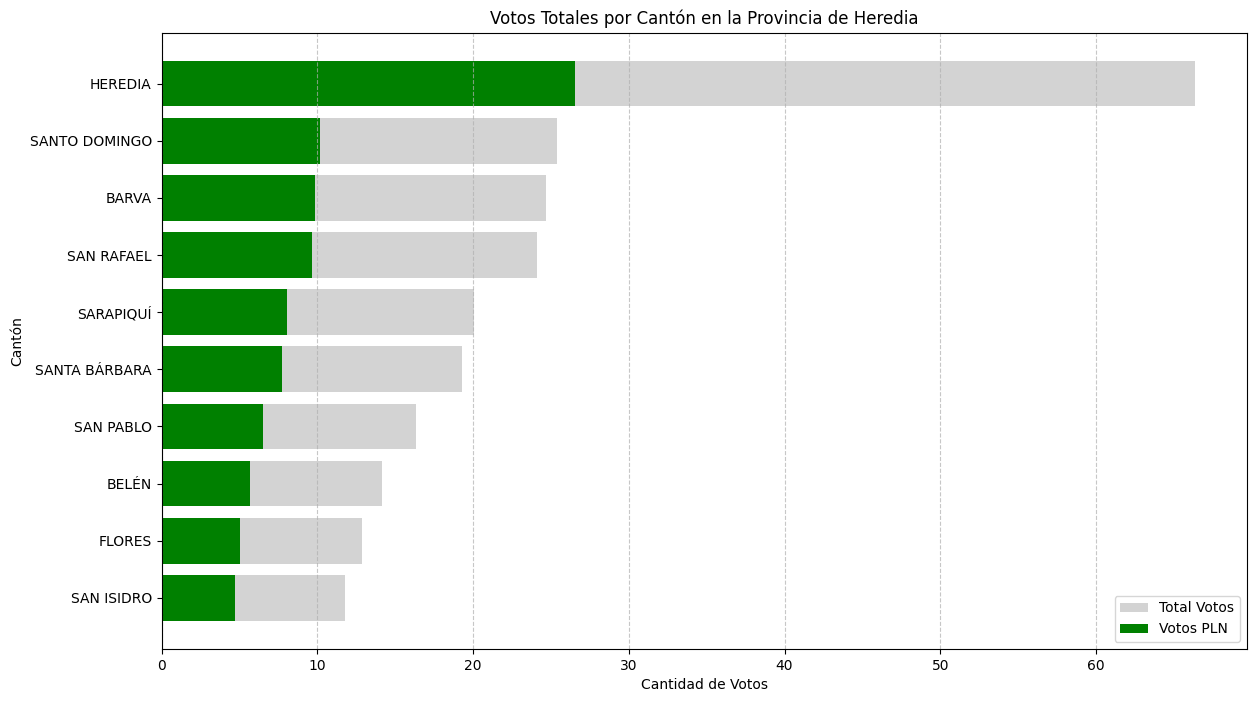

In [29]:
# Filtrar los datos de la provincia de Heredia
df_heredia = df_updated[df_updated['Provincia'] == 'HEREDIA']

# Agrupar los votos totales y los votos de PLN por cantón
votos_totales_canton_heredia = df_heredia.groupby('Cantón')['Votos_Totales'].sum().sort_values(ascending=True)
votos_pln_canton_heredia = df_heredia.groupby('Cantón')['Votos_PLN_2022'].sum().reindex(votos_totales_canton_heredia.index)

# Crear el gráfico de barras apiladas para los cantones de Heredia con etiquetas ordenadas
plt.figure(figsize=(14, 8))

# Gráfico de votos totales en gris claro
plt.barh(votos_totales_canton_heredia.index, votos_totales_canton_heredia, label='Total Votos', color='lightgray')

# Gráfico de votos del PLN en verde (superpuesto)
plt.barh(votos_pln_canton_heredia.index, votos_pln_canton_heredia, label='Votos PLN', color='green')

# Personalización del gráfico
plt.title('Votos Totales por Cantón en la Provincia de Heredia')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Cantón')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()




**Dominio Urbano:** El partido Liberación Nacional (PLN) tiene una fuerte presencia en el cantón central de Heredia, capturando una gran proporción de los votos totales.

**Desempeño en Cantones Menores:** Aunque la representación del PLN en los cantones pequeños es menor, su participación sigue siendo destacable en varios de ellos.

**Distribución Estratégica:** La captación de votos está claramente orientada hacia los centros urbanos y cantones densamente poblados, lo que sugiere un enfoque estratégico hacia el electorado urbano.

#### 5. Guanacaste

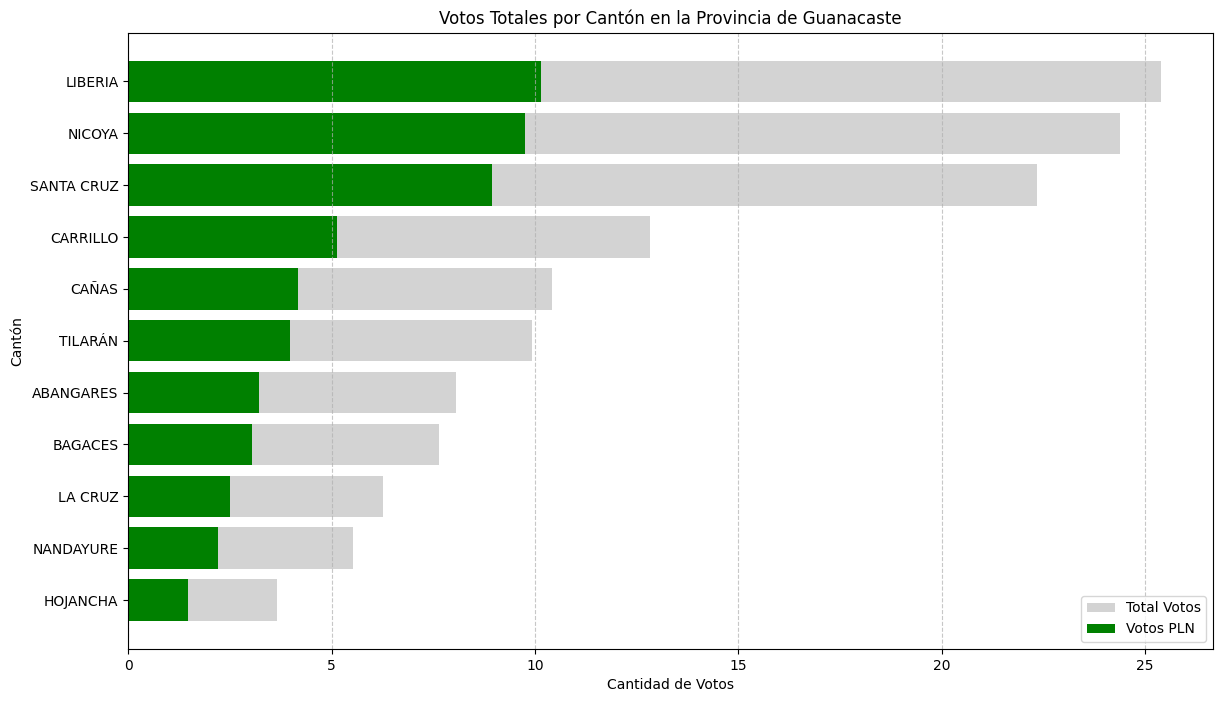

In [30]:
# Filtrar los datos de la provincia de Guanacaste
df_guanacaste = df_updated[df_updated['Provincia'] == 'GUANACASTE']

# Agrupar los votos totales y los votos de PLN por cantón
votos_totales_canton_guanacaste = df_guanacaste.groupby('Cantón')['Votos_Totales'].sum().sort_values(ascending=True)
votos_pln_canton_guanacaste = df_guanacaste.groupby('Cantón')['Votos_PLN_2022'].sum().reindex(votos_totales_canton_guanacaste.index)

# Crear el gráfico de barras apiladas para los cantones de Guanacaste con etiquetas ordenadas
plt.figure(figsize=(14, 8))

# Gráfico de votos totales en gris claro
plt.barh(votos_totales_canton_guanacaste.index, votos_totales_canton_guanacaste, label='Total Votos', color='lightgray')

# Gráfico de votos del PLN en verde (superpuesto)
plt.barh(votos_pln_canton_guanacaste.index, votos_pln_canton_guanacaste, label='Votos PLN', color='green')

# Personalización del gráfico
plt.title('Votos Totales por Cantón en la Provincia de Guanacaste')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Cantón')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


**Dominio Urbano:** El PLN logra captar un gran volumen de votos en los cantones con mayor densidad poblacional, especialmente en Liberia.

**Desafíos Rurales:** La presencia del PLN en cantones rurales es menor, lo que podría indicar una desconexión con el electorado rural o falta de estrategias efectivas en estas áreas.

**Concentración del Voto:** Los resultados sugieren que el PLN depende en gran medida de su fortaleza en los cantones más grandes, mientras que su presencia en cantones menos poblados es limitada.

#### 6. Puntarenas

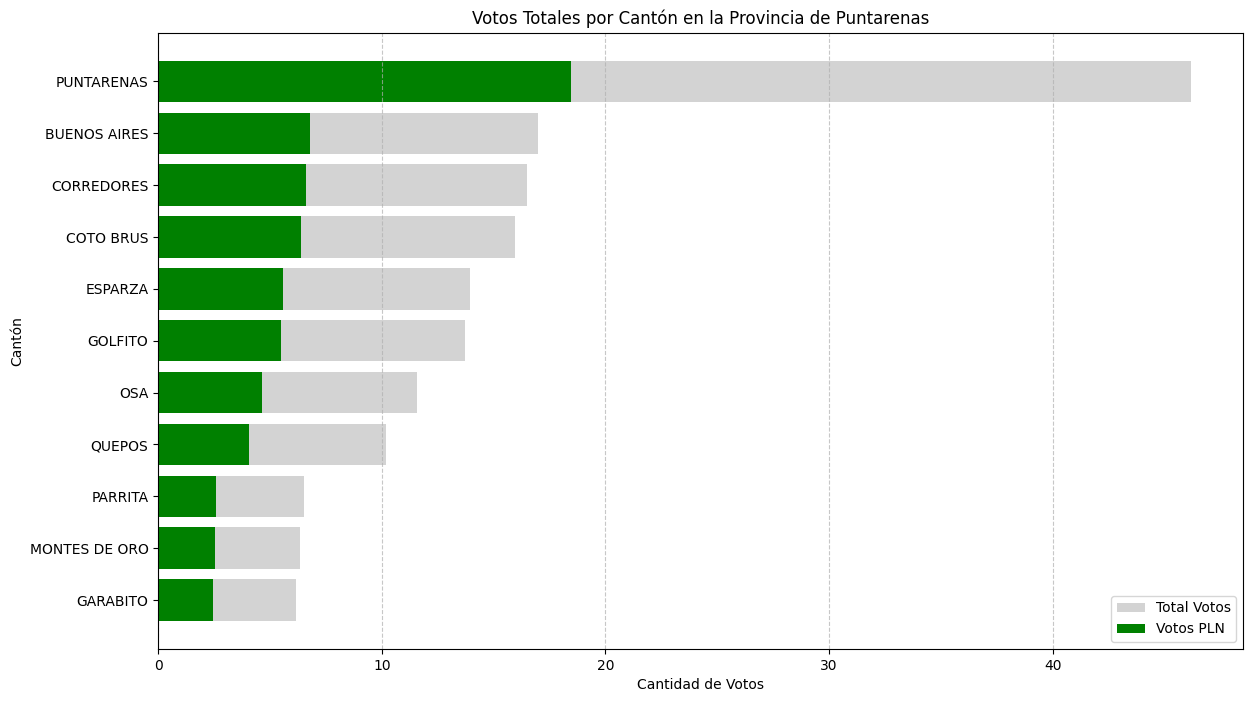

In [31]:
# Filtrar los datos de la provincia de Puntarenas
df_puntarenas = df_updated[df_updated['Provincia'] == 'PUNTARENAS']

# Agrupar los votos totales y los votos de PLN por cantón
votos_totales_canton_puntarenas = df_puntarenas.groupby('Cantón')['Votos_Totales'].sum().sort_values(ascending=True)
votos_pln_canton_puntarenas = df_puntarenas.groupby('Cantón')['Votos_PLN_2022'].sum().reindex(votos_totales_canton_puntarenas.index)

# Crear el gráfico de barras apiladas para los cantones de Puntarenas con etiquetas ordenadas
plt.figure(figsize=(14, 8))

# Gráfico de votos totales en gris claro
plt.barh(votos_totales_canton_puntarenas.index, votos_totales_canton_puntarenas, label='Total Votos', color='lightgray')

# Gráfico de votos del PLN en verde (superpuesto)
plt.barh(votos_pln_canton_puntarenas.index, votos_pln_canton_puntarenas, label='Votos PLN', color='green')

# Personalización del gráfico
plt.title('Votos Totales por Cantón en la Provincia de Puntarenas')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Cantón')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


**Dominio Urbano:** El partido Liberación Nacional (PLN) logra captar un volumen significativo de votos en el cantón central de Puntarenas, que es el principal núcleo urbano de la provincia.

**Desafíos en Cantones Rurales:** El PLN enfrenta dificultades para captar una mayor proporción de votos en cantones más pequeños y rurales, como Montes de Oro y Garabito.

**Concentración de Apoyo:** El apoyo al PLN se concentra principalmente en el cantón central de Puntarenas, lo que puede sugerir un enfoque de campaña más dirigido a zonas urbanas.


#### 7. Limón

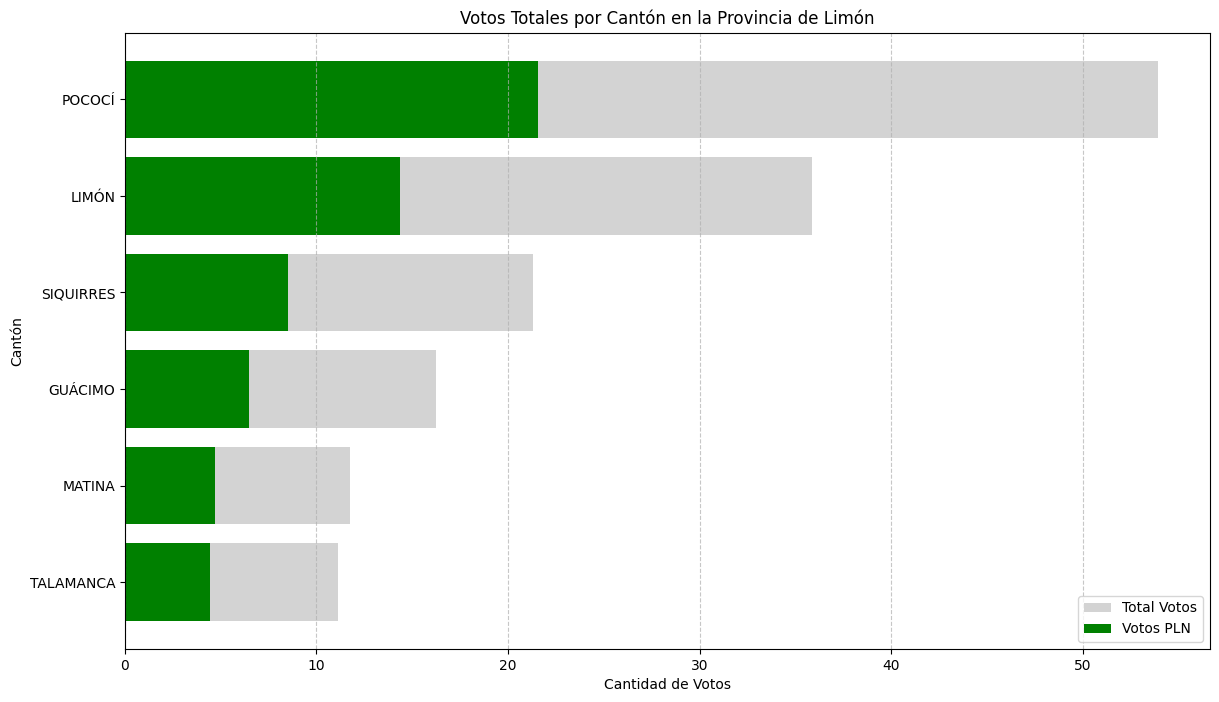

In [32]:
# Filtrar los datos de la provincia de Limón
df_limon = df_updated[df_updated['Provincia'] == 'LIMÓN']

# Agrupar los votos totales y los votos de PLN por cantón
votos_totales_canton_limon = df_limon.groupby('Cantón')['Votos_Totales'].sum().sort_values(ascending=True)
votos_pln_canton_limon = df_limon.groupby('Cantón')['Votos_PLN_2022'].sum().reindex(votos_totales_canton_limon.index)

# Crear el gráfico de barras apiladas para los cantones de Limón con etiquetas ordenadas
plt.figure(figsize=(14, 8))

# Gráfico de votos totales en gris claro
plt.barh(votos_totales_canton_limon.index, votos_totales_canton_limon, label='Total Votos', color='lightgray')

# Gráfico de votos del PLN en verde (superpuesto)
plt.barh(votos_pln_canton_limon.index, votos_pln_canton_limon, label='Votos PLN', color='green')

# Personalización del gráfico
plt.title('Votos Totales por Cantón en la Provincia de Limón')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Cantón')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


**Dominio Urbano:** El partido Liberación Nacional (PLN) logra captar un gran volumen de votos en el cantón central de Limón, que concentra gran parte de la actividad urbana de la provincia.

**Desafíos en Cantones Rurales:** En cantones rurales como Talamanca y Siquirres, el volumen de votos del PLN es bajo, lo que puede reflejar una falta de conexión con el electorado rural.

**Desempeño Estratégico:** La captación de votos está claramente concentrada en los cantones con mayor densidad poblacional, lo que puede ser indicativo de un enfoque estratégico orientado a áreas urbanas.

## 3. Nivel comparativo con Partidos

### A. Partido Social Demócrata

##### San José

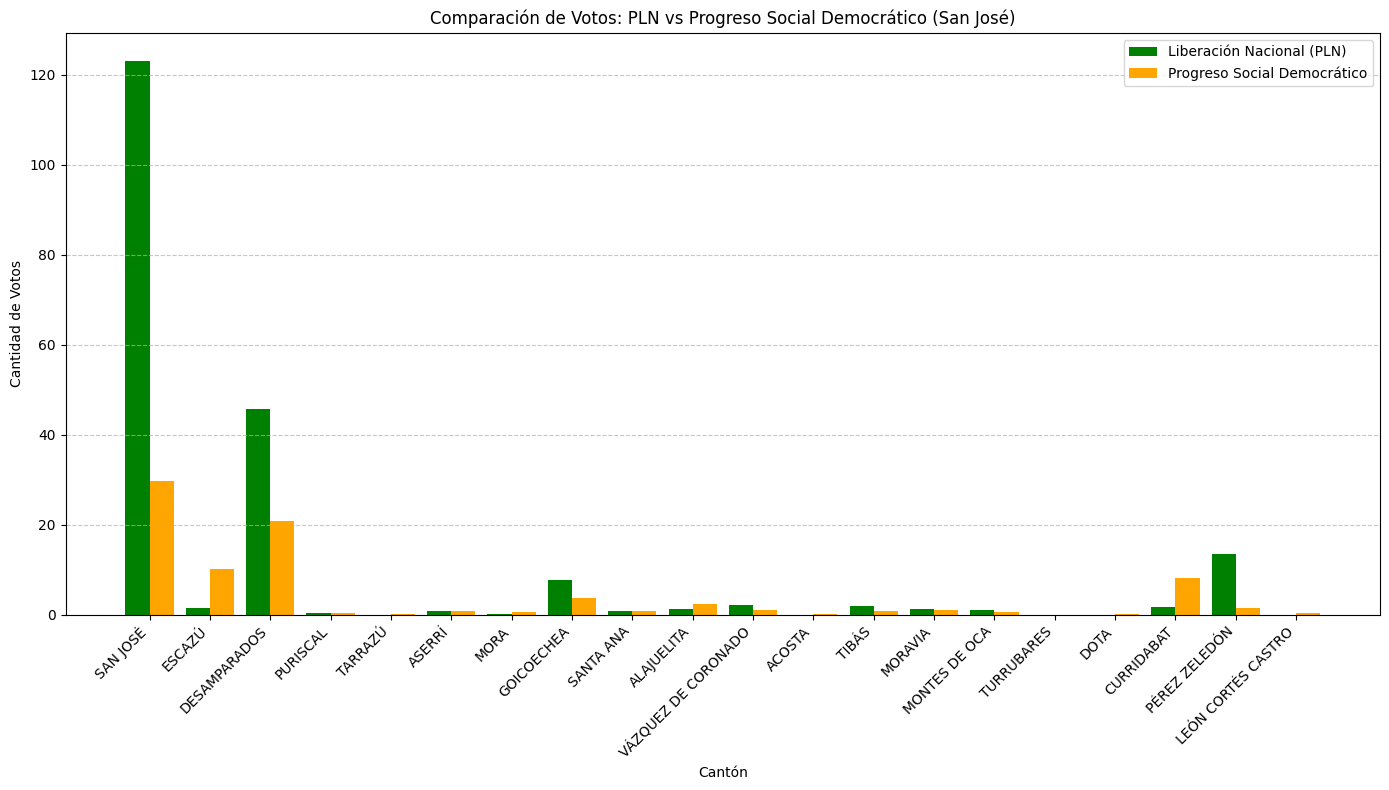

In [34]:
# Asegurarnos de que las columnas contengan solo números
df_san_jose['Votos_PLN_2022'] = pd.to_numeric(df_san_jose['Votos_PLN_2022'], errors='coerce')
df_san_jose['Progreso_Social_Democratico'] = pd.to_numeric(df_san_jose['Progreso_Social_Democratico'], errors='coerce')

# Eliminar filas con valores NaN en ambas columnas de votos
df_san_jose = df_san_jose.dropna(subset=['Votos_PLN_2022', 'Progreso_Social_Democratico'])

# Verificar si los votos están en proporción y convertir a números absolutos si es necesario
if df_san_jose['Votos_PLN_2022'].max() < 100 or df_san_jose['Progreso_Social_Democratico'].max() < 100:
    df_san_jose['Votos_PLN_2022'] = df_san_jose['Votos_PLN_2022'] * df_san_jose['Votos_Totales'] / 100
    df_san_jose['Progreso_Social_Democratico'] = df_san_jose['Progreso_Social_Democratico'] * df_san_jose['Votos_Totales'] / 100

# Preparar los datos
cantones = df_san_jose['Cantón']
votos_pln = df_san_jose['Votos_PLN_2022']
votos_progreso = df_san_jose['Progreso_Social_Democratico']

# Configuración del gráfico
x = np.arange(len(cantones))  # Posiciones de los grupos
width = 0.4  # Ancho de las barras

plt.figure(figsize=(14, 8))

# Barras para el PLN
plt.bar(x - width/2, votos_pln, width, label='Liberación Nacional (PLN)', color='green')

# Barras para Progreso Social Democrático
plt.bar(x + width/2, votos_progreso, width, label='Progreso Social Democrático', color='orange')

# Personalización del gráfico
plt.title('Comparación de Votos: PLN vs Progreso Social Democrático (San José)')
plt.xlabel('Cantón')
plt.ylabel('Cantidad de Votos')
plt.xticks(x, cantones, rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajuste automático para que no se recorten las etiquetas
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


##### Alajuela

<ipython-input-36-547536a71a03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alajuela['Votos_PLN_2022'] = pd.to_numeric(df_alajuela['Votos_PLN_2022'], errors='coerce')
<ipython-input-36-547536a71a03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alajuela['Progreso_Social_Democratico'] = pd.to_numeric(df_alajuela['Progreso_Social_Democratico'], errors='coerce')


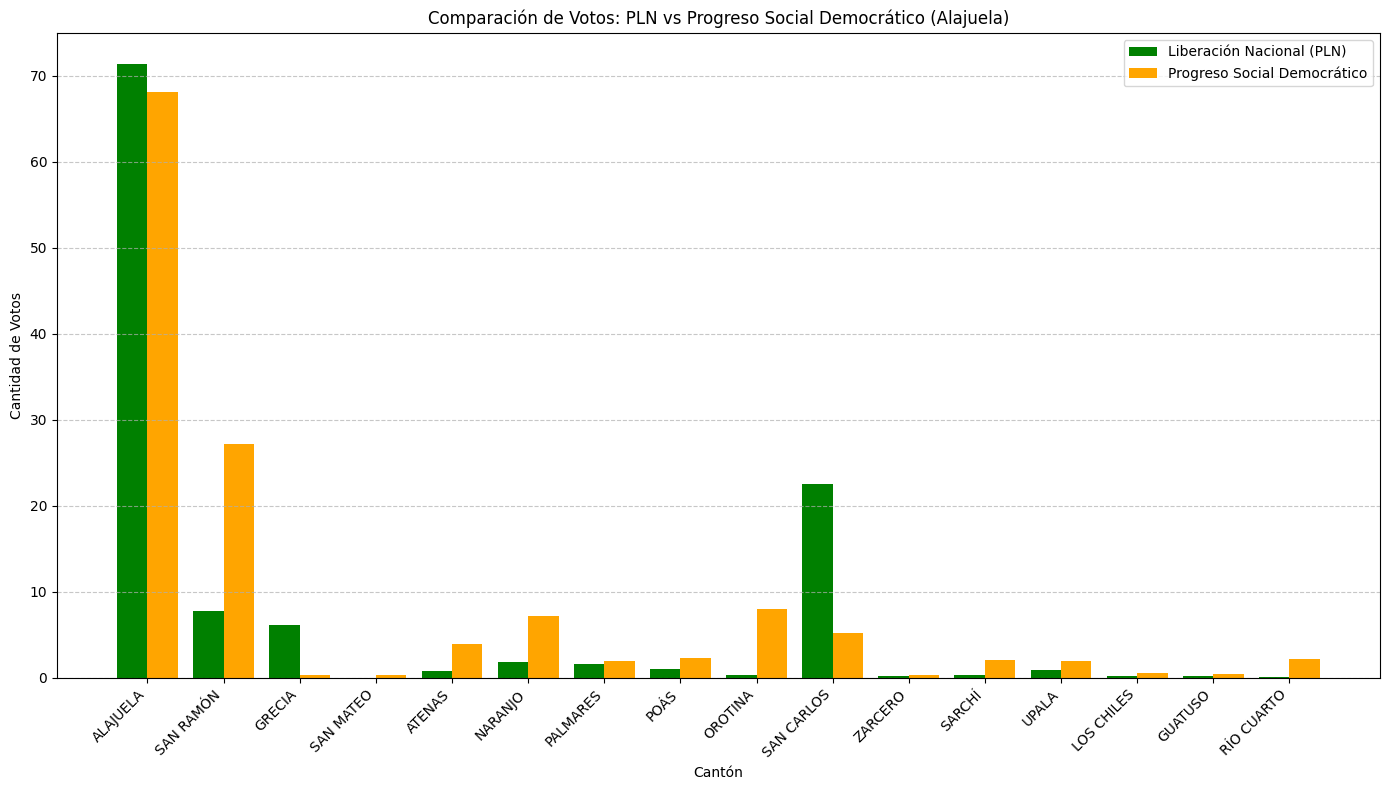

In [36]:
# Asegurarnos de que las columnas contengan solo números
df_alajuela['Votos_PLN_2022'] = pd.to_numeric(df_alajuela['Votos_PLN_2022'], errors='coerce')
df_alajuela['Progreso_Social_Democratico'] = pd.to_numeric(df_alajuela['Progreso_Social_Democratico'], errors='coerce')

# Eliminar filas con valores NaN en ambas columnas de votos
df_alajuela = df_alajuela.dropna(subset=['Votos_PLN_2022', 'Progreso_Social_Democratico'])

# Verificar si los votos están en proporción y convertir a números absolutos si es necesario
if df_alajuela['Votos_PLN_2022'].max() < 100 or df_alajuela['Progreso_Social_Democratico'].max() < 100:
    df_alajuela['Votos_PLN_2022'] = df_alajuela['Votos_PLN_2022'] * df_alajuela['Votos_Totales'] / 100
    df_alajuela['Progreso_Social_Democratico'] = df_alajuela['Progreso_Social_Democratico'] * df_alajuela['Votos_Totales'] / 100

# Preparar los datos
cantones = df_alajuela['Cantón']
votos_pln = df_alajuela['Votos_PLN_2022']
votos_progreso = df_alajuela['Progreso_Social_Democratico']

# Configuración del gráfico
x = np.arange(len(cantones))  # Posiciones de los grupos
width = 0.4  # Ancho de las barras

plt.figure(figsize=(14, 8))

# Barras para el PLN
plt.bar(x - width/2, votos_pln, width, label='Liberación Nacional (PLN)', color='green')

# Barras para Progreso Social Democrático
plt.bar(x + width/2, votos_progreso, width, label='Progreso Social Democrático', color='orange')

# Personalización del gráfico
plt.title('Comparación de Votos: PLN vs Progreso Social Democrático (Alajuela)')
plt.xlabel('Cantón')
plt.ylabel('Cantidad de Votos')
plt.xticks(x, cantones, rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajuste automático para que no se recorten las etiquetas
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


##### Cartago

<ipython-input-40-acf47590695e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cartago['Votos_PLN_2022'] = pd.to_numeric(df_cartago['Votos_PLN_2022'], errors='coerce')
<ipython-input-40-acf47590695e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cartago['Progreso_Social_Democratico'] = pd.to_numeric(df_cartago['Progreso_Social_Democratico'], errors='coerce')


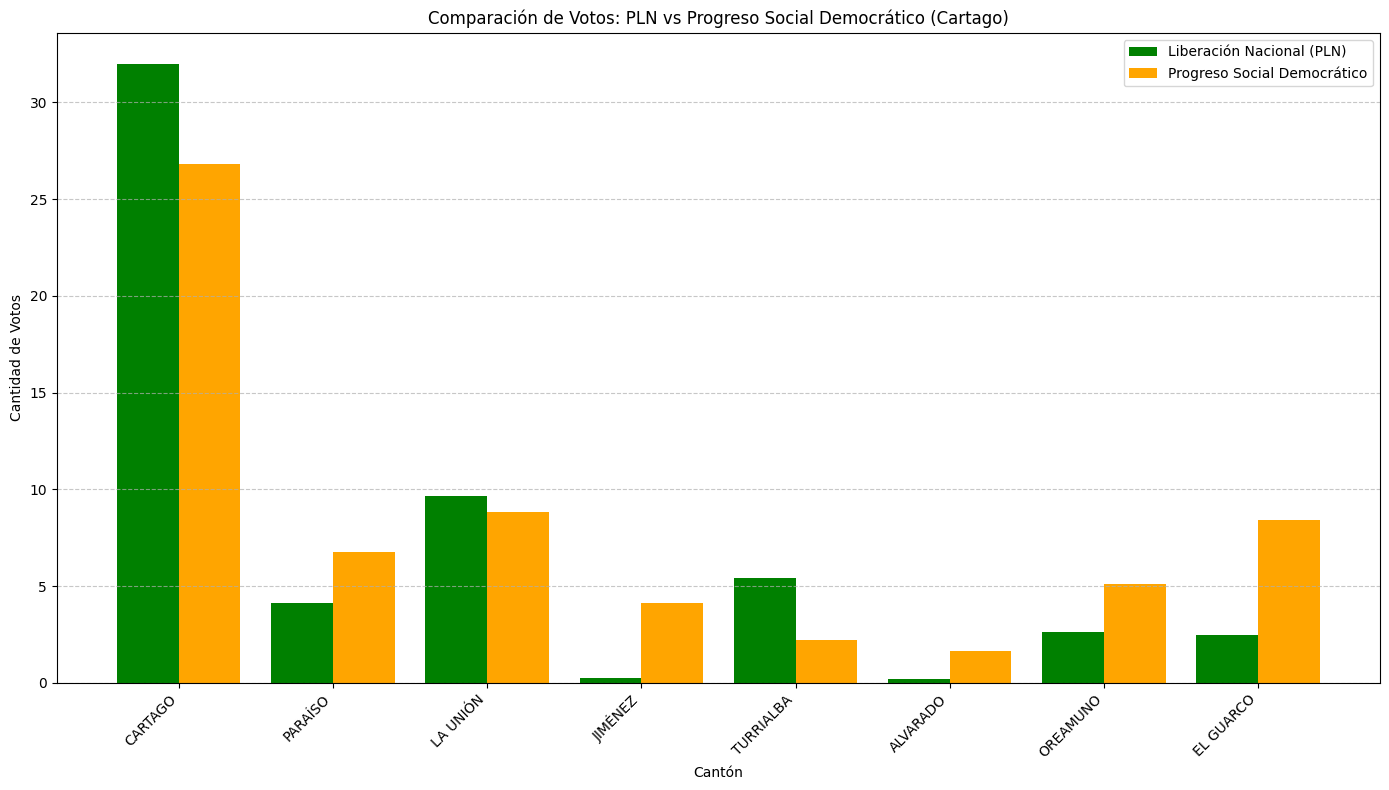

In [40]:
# Asegurarnos de que las columnas contengan solo números
df_cartago['Votos_PLN_2022'] = pd.to_numeric(df_cartago['Votos_PLN_2022'], errors='coerce')
df_cartago['Progreso_Social_Democratico'] = pd.to_numeric(df_cartago['Progreso_Social_Democratico'], errors='coerce')

# Eliminar filas con valores NaN en ambas columnas de votos
df_cartago = df_cartago.dropna(subset=['Votos_PLN_2022', 'Progreso_Social_Democratico'])

# Verificar si los votos están en proporción y convertir a números absolutos si es necesario
if df_cartago['Votos_PLN_2022'].max() < 100 or df_cartago['Progreso_Social_Democratico'].max() < 100:
    df_cartago['Votos_PLN_2022'] = df_cartago['Votos_PLN_2022'] * df_cartago['Votos_Totales'] / 100
    df_cartago['Progreso_Social_Democratico'] = df_cartago['Progreso_Social_Democratico'] * df_cartago['Votos_Totales'] / 100

# Preparar los datos
cantones = df_cartago['Cantón']
votos_pln = df_cartago['Votos_PLN_2022']
votos_progreso = df_cartago['Progreso_Social_Democratico']

# Configuración del gráfico
x = np.arange(len(cantones))  # Posiciones de los grupos
width = 0.4  # Ancho de las barras

plt.figure(figsize=(14, 8))

# Barras para el PLN
plt.bar(x - width/2, votos_pln, width, label='Liberación Nacional (PLN)', color='green')

# Barras para Progreso Social Democrático
plt.bar(x + width/2, votos_progreso, width, label='Progreso Social Democrático', color='orange')

# Personalización del gráfico
plt.title('Comparación de Votos: PLN vs Progreso Social Democrático (Cartago)')
plt.xlabel('Cantón')
plt.ylabel('Cantidad de Votos')
plt.xticks(x, cantones, rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajuste automático para que no se recorten las etiquetas
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


##### Heredia

<ipython-input-38-b51a284c36be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heredia['Votos_PLN_2022'] = pd.to_numeric(df_heredia['Votos_PLN_2022'], errors='coerce')
<ipython-input-38-b51a284c36be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heredia['Progreso_Social_Democratico'] = pd.to_numeric(df_heredia['Progreso_Social_Democratico'], errors='coerce')


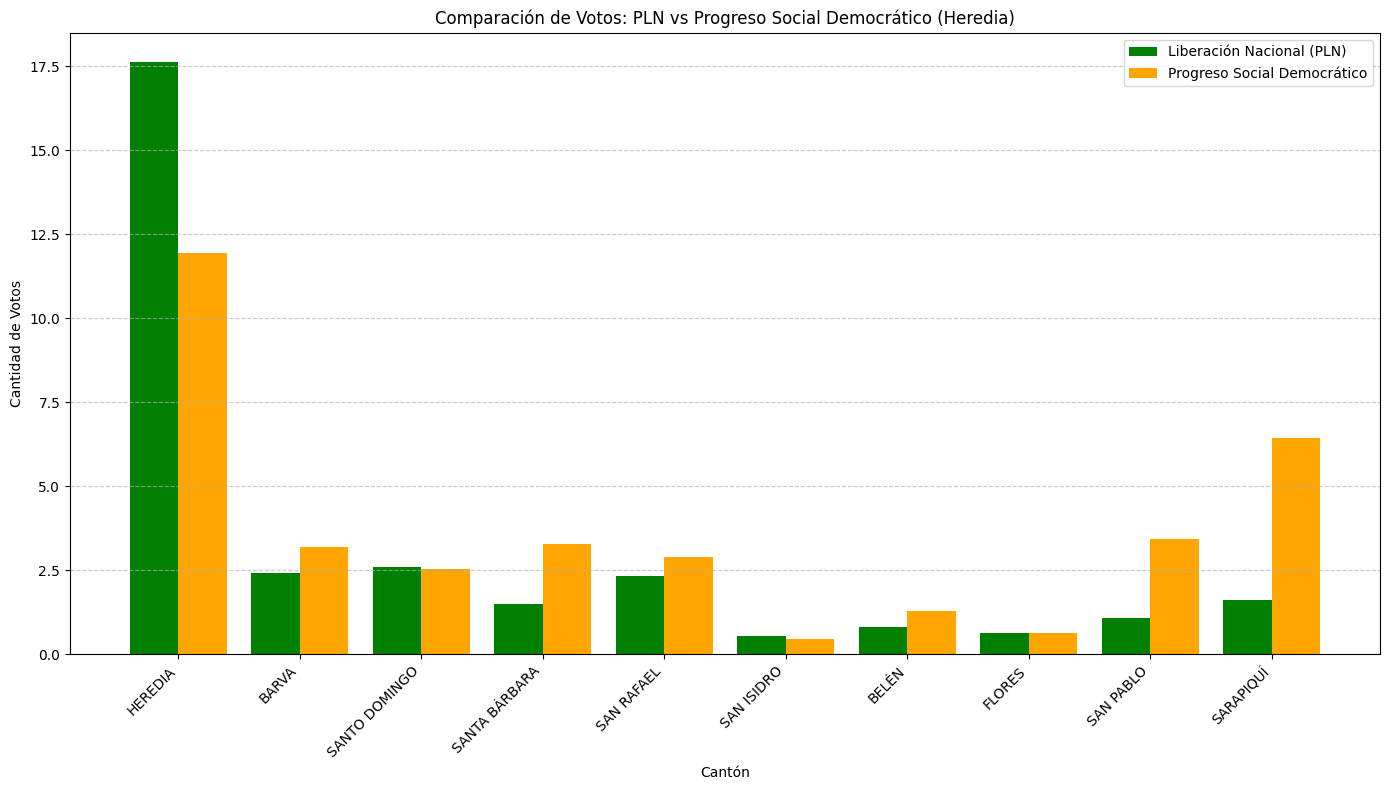

In [38]:
# Asegurarnos de que las columnas contengan solo números
df_heredia['Votos_PLN_2022'] = pd.to_numeric(df_heredia['Votos_PLN_2022'], errors='coerce')
df_heredia['Progreso_Social_Democratico'] = pd.to_numeric(df_heredia['Progreso_Social_Democratico'], errors='coerce')

# Eliminar filas con valores NaN en ambas columnas de votos
df_heredia = df_heredia.dropna(subset=['Votos_PLN_2022', 'Progreso_Social_Democratico'])

# Verificar si los votos están en proporción y convertir a números absolutos si es necesario
if df_heredia['Votos_PLN_2022'].max() < 100 or df_heredia['Progreso_Social_Democratico'].max() < 100:
    df_heredia['Votos_PLN_2022'] = df_heredia['Votos_PLN_2022'] * df_heredia['Votos_Totales'] / 100
    df_heredia['Progreso_Social_Democratico'] = df_heredia['Progreso_Social_Democratico'] * df_heredia['Votos_Totales'] / 100

# Preparar los datos
cantones = df_heredia['Cantón']
votos_pln = df_heredia['Votos_PLN_2022']
votos_progreso = df_heredia['Progreso_Social_Democratico']

# Configuración del gráfico
x = np.arange(len(cantones))  # Posiciones de los grupos
width = 0.4  # Ancho de las barras

plt.figure(figsize=(14, 8))

# Barras para el PLN
plt.bar(x - width/2, votos_pln, width, label='Liberación Nacional (PLN)', color='green')

# Barras para Progreso Social Democrático
plt.bar(x + width/2, votos_progreso, width, label='Progreso Social Democrático', color='orange')

# Personalización del gráfico
plt.title('Comparación de Votos: PLN vs Progreso Social Democrático (Heredia)')
plt.xlabel('Cantón')
plt.ylabel('Cantidad de Votos')
plt.xticks(x, cantones, rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajuste automático para que no se recorten las etiquetas
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


##### Guanacaste

<ipython-input-41-843573b11a71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guanacaste['Votos_PLN_2022'] = pd.to_numeric(df_guanacaste['Votos_PLN_2022'], errors='coerce')
<ipython-input-41-843573b11a71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guanacaste['Progreso_Social_Democratico'] = pd.to_numeric(df_guanacaste['Progreso_Social_Democratico'], errors='coerce')


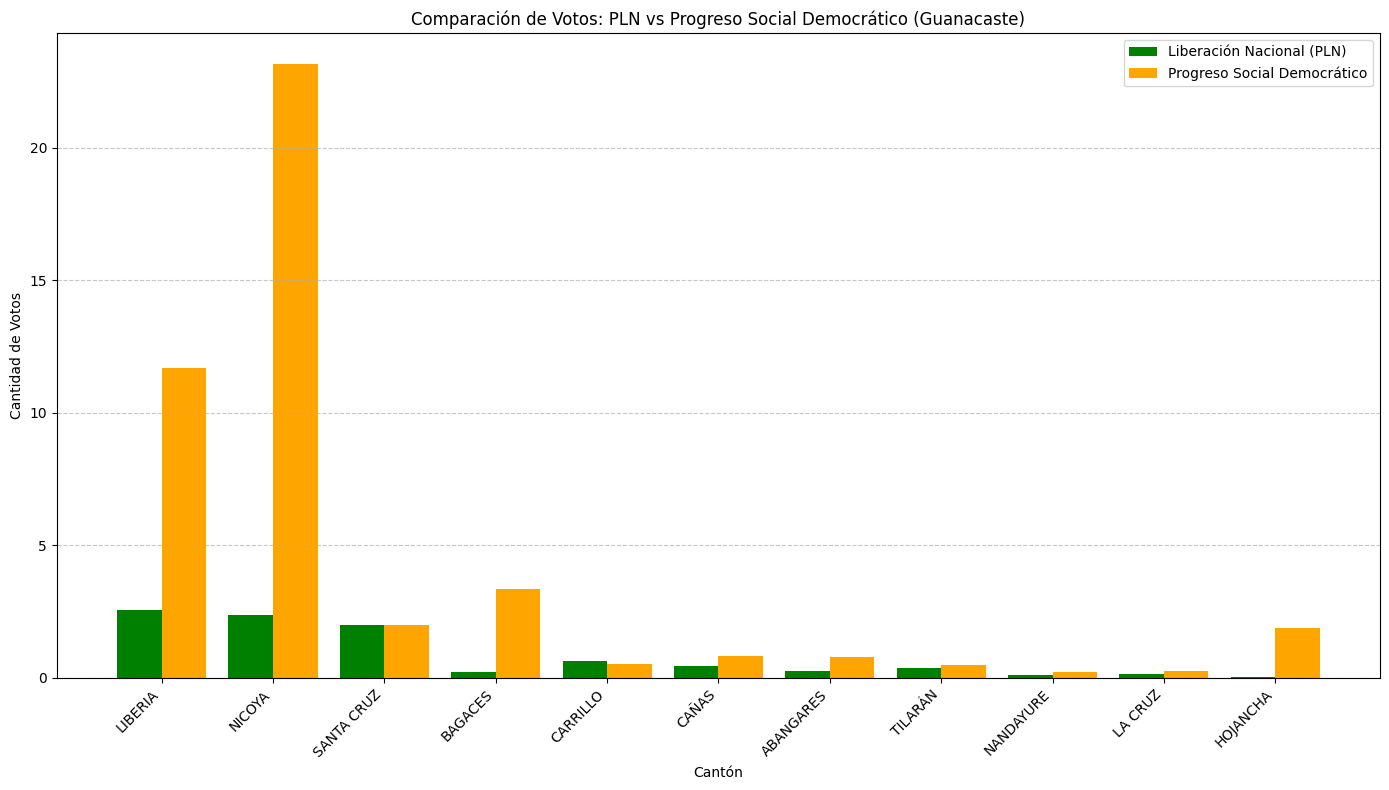

In [41]:
# Asegurarnos de que las columnas contengan solo números
df_guanacaste['Votos_PLN_2022'] = pd.to_numeric(df_guanacaste['Votos_PLN_2022'], errors='coerce')
df_guanacaste['Progreso_Social_Democratico'] = pd.to_numeric(df_guanacaste['Progreso_Social_Democratico'], errors='coerce')

# Eliminar filas con valores NaN en ambas columnas de votos
df_guanacaste = df_guanacaste.dropna(subset=['Votos_PLN_2022', 'Progreso_Social_Democratico'])

# Verificar si los votos están en proporción y convertir a números absolutos si es necesario
if df_guanacaste['Votos_PLN_2022'].max() < 100 or df_guanacaste['Progreso_Social_Democratico'].max() < 100:
    df_guanacaste['Votos_PLN_2022'] = df_guanacaste['Votos_PLN_2022'] * df_guanacaste['Votos_Totales'] / 100
    df_guanacaste['Progreso_Social_Democratico'] = df_guanacaste['Progreso_Social_Democratico'] * df_guanacaste['Votos_Totales'] / 100

# Preparar los datos
cantones = df_guanacaste['Cantón']
votos_pln = df_guanacaste['Votos_PLN_2022']
votos_progreso = df_guanacaste['Progreso_Social_Democratico']

# Configuración del gráfico
x = np.arange(len(cantones))  # Posiciones de los grupos
width = 0.4  # Ancho de las barras

plt.figure(figsize=(14, 8))

# Barras para el PLN
plt.bar(x - width/2, votos_pln, width, label='Liberación Nacional (PLN)', color='green')

# Barras para Progreso Social Democrático
plt.bar(x + width/2, votos_progreso, width, label='Progreso Social Democrático', color='orange')

# Personalización del gráfico
plt.title('Comparación de Votos: PLN vs Progreso Social Democrático (Guanacaste)')
plt.xlabel('Cantón')
plt.ylabel('Cantidad de Votos')
plt.xticks(x, cantones, rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajuste automático para que no se recorten las etiquetas
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


##### Puntarenas

<ipython-input-43-a27ae6814093>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puntarenas['Votos_PLN_2022'] = pd.to_numeric(df_puntarenas['Votos_PLN_2022'], errors='coerce')
<ipython-input-43-a27ae6814093>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puntarenas['Progreso_Social_Democratico'] = pd.to_numeric(df_puntarenas['Progreso_Social_Democratico'], errors='coerce')


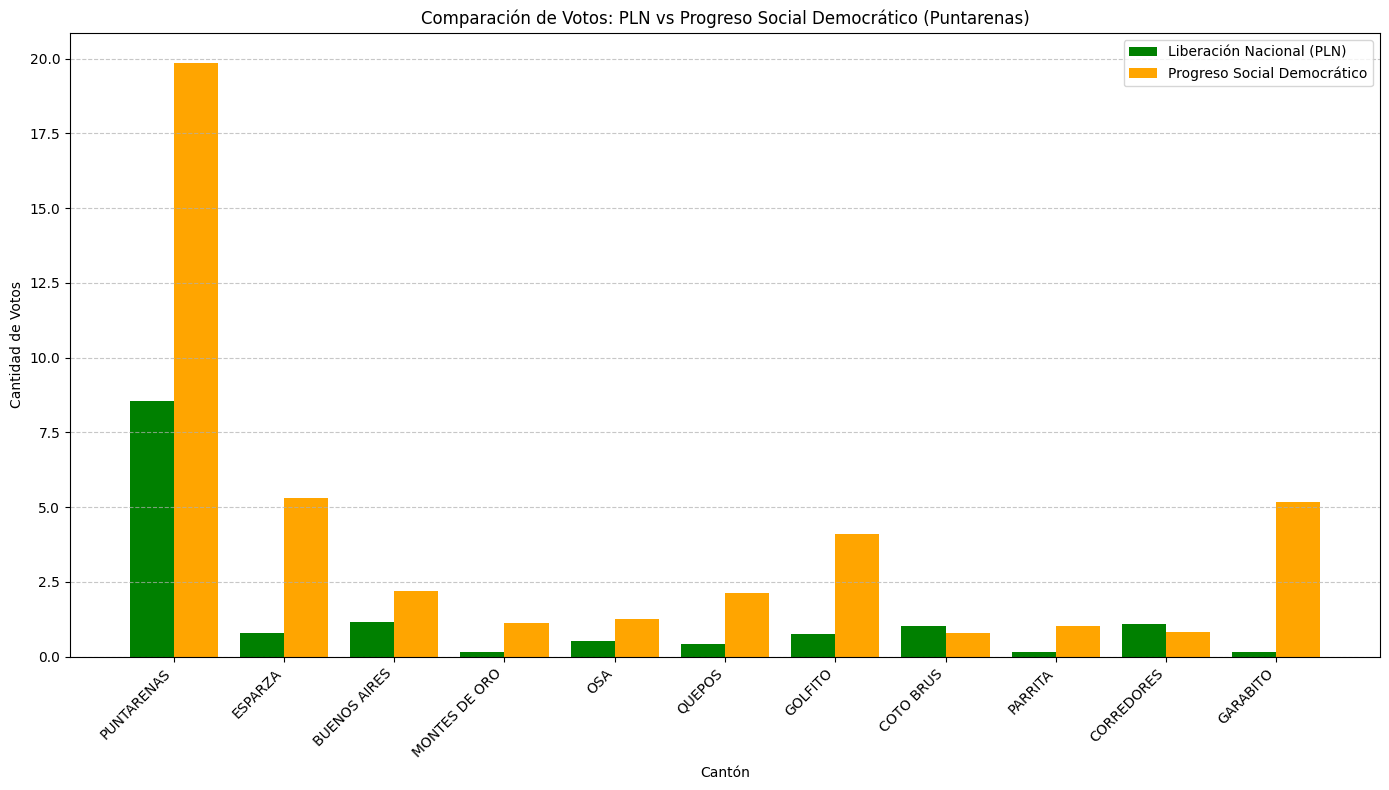

In [43]:
# Asegurarnos de que las columnas contengan solo números
df_puntarenas['Votos_PLN_2022'] = pd.to_numeric(df_puntarenas['Votos_PLN_2022'], errors='coerce')
df_puntarenas['Progreso_Social_Democratico'] = pd.to_numeric(df_puntarenas['Progreso_Social_Democratico'], errors='coerce')

# Eliminar filas con valores NaN en ambas columnas de votos
df_puntarenas = df_puntarenas.dropna(subset=['Votos_PLN_2022', 'Progreso_Social_Democratico'])

# Verificar si los votos están en proporción y convertir a números absolutos si es necesario
if df_puntarenas['Votos_PLN_2022'].max() < 100 or df_puntarenas['Progreso_Social_Democratico'].max() < 100:
    df_puntarenas['Votos_PLN_2022'] = df_puntarenas['Votos_PLN_2022'] * df_puntarenas['Votos_Totales'] / 100
    df_puntarenas['Progreso_Social_Democratico'] = df_puntarenas['Progreso_Social_Democratico'] * df_puntarenas['Votos_Totales'] / 100

# Preparar los datos
cantones = df_puntarenas['Cantón']
votos_pln = df_puntarenas['Votos_PLN_2022']
votos_progreso = df_puntarenas['Progreso_Social_Democratico']

# Configuración del gráfico
x = np.arange(len(cantones))  # Posiciones de los grupos
width = 0.4  # Ancho de las barras

plt.figure(figsize=(14, 8))

# Barras para el PLN
plt.bar(x - width/2, votos_pln, width, label='Liberación Nacional (PLN)', color='green')

# Barras para Progreso Social Democrático
plt.bar(x + width/2, votos_progreso, width, label='Progreso Social Democrático', color='orange')

# Personalización del gráfico
plt.title('Comparación de Votos: PLN vs Progreso Social Democrático (Puntarenas)')
plt.xlabel('Cantón')
plt.ylabel('Cantidad de Votos')
plt.xticks(x, cantones, rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajuste automático para que no se recorten las etiquetas
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


##### Limon

<ipython-input-45-23956fcd73b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limon['Votos_PLN_2022'] = pd.to_numeric(df_limon['Votos_PLN_2022'], errors='coerce')
<ipython-input-45-23956fcd73b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limon['Progreso_Social_Democratico'] = pd.to_numeric(df_limon['Progreso_Social_Democratico'], errors='coerce')
<ipython-input-45-23956fcd73b1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

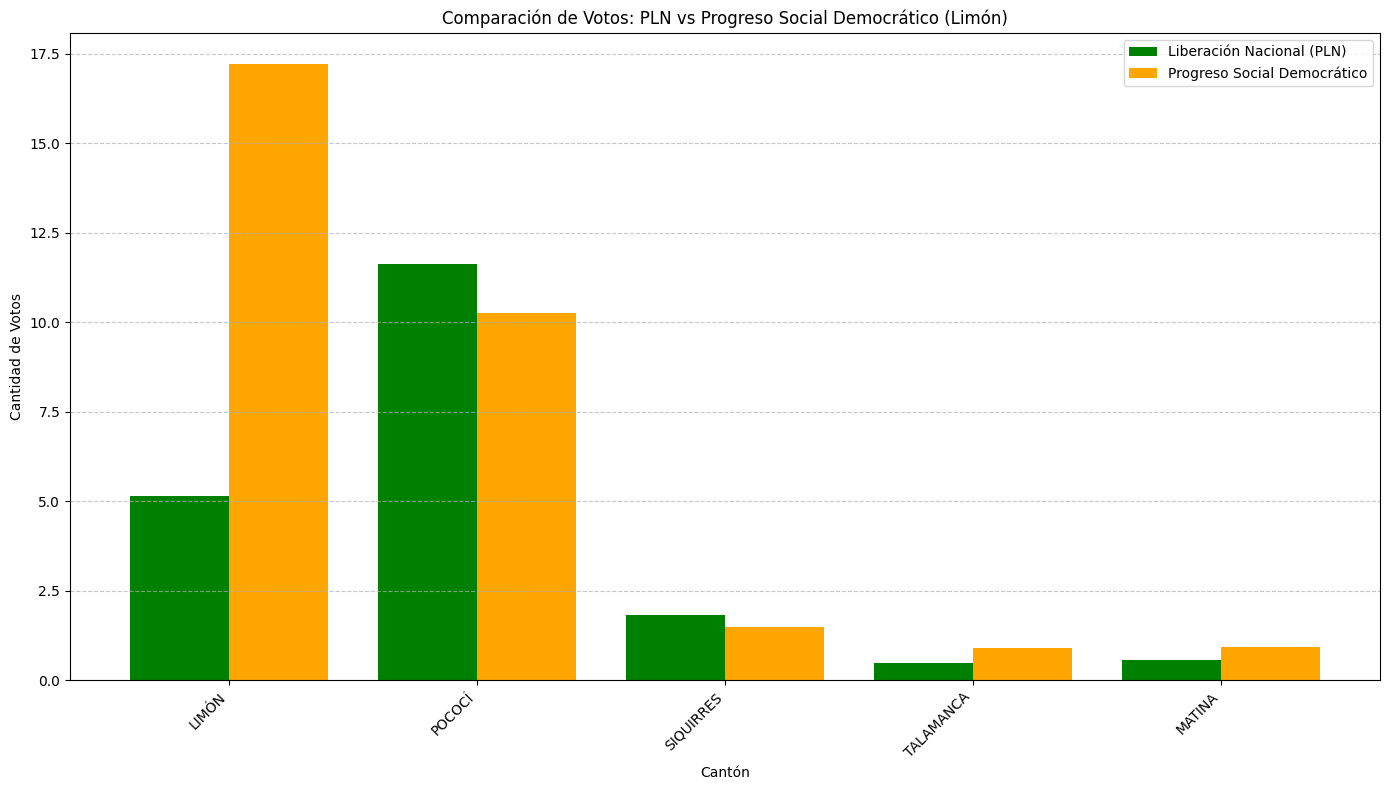

In [45]:
# Asegurarnos de que las columnas contengan solo números
df_limon['Votos_PLN_2022'] = pd.to_numeric(df_limon['Votos_PLN_2022'], errors='coerce')
df_limon['Progreso_Social_Democratico'] = pd.to_numeric(df_limon['Progreso_Social_Democratico'], errors='coerce')

# Eliminar filas con valores NaN en ambas columnas de votos
df_limon = df_limon.dropna(subset=['Votos_PLN_2022', 'Progreso_Social_Democratico'])

# Verificar si los votos están en proporción y convertir a números absolutos si es necesario
if df_limon['Votos_PLN_2022'].max() < 100 or df_limon['Progreso_Social_Democratico'].max() < 100:
    df_limon['Votos_PLN_2022'] = df_limon['Votos_PLN_2022'] * df_limon['Votos_Totales'] / 100
    df_limon['Progreso_Social_Democratico'] = df_limon['Progreso_Social_Democratico'] * df_limon['Votos_Totales'] / 100

# Preparar los datos
cantones = df_limon['Cantón']
votos_pln = df_limon['Votos_PLN_2022']
votos_progreso = df_limon['Progreso_Social_Democratico']

# Configuración del gráfico
x = np.arange(len(cantones))  # Posiciones de los grupos
width = 0.4  # Ancho de las barras

plt.figure(figsize=(14, 8))

# Barras para el PLN
plt.bar(x - width/2, votos_pln, width, label='Liberación Nacional (PLN)', color='green')

# Barras para Progreso Social Democrático
plt.bar(x + width/2, votos_progreso, width, label='Progreso Social Democrático', color='orange')

# Personalización del gráfico
plt.title('Comparación de Votos: PLN vs Progreso Social Democrático (Limón)')
plt.xlabel('Cantón')
plt.ylabel('Cantidad de Votos')
plt.xticks(x, cantones, rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajuste automático para que no se recorten las etiquetas
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

